In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.datasets import load_iris

from DecisionTree import *

In [2]:
def dfs_plot(root):
    now = root
    ni = 0
    done = set()
    record = {}
    while True:
        update = 0
        record[ni] = now
        # やりたい処理をここに書く
        if not now.rule:
            nii = ni
            area = [[-1,-1],[-1,-1]]
            while nii:
                mode = nii%2
                nii = (nii-1)//2
                axis,val = record[nii].rule
                if area[axis][mode] == -1: area[axis][mode] = val
            for i in range(2):
                for j in range(2):
                    if area[i][j] == -1: area[i][j] = [[4,8],[1.8,4.5]][i][j]
            rect = patches.Rectangle((area[0][0], area[1][0]), 
                                     area[0][1]-area[0][0], 
                                     area[1][1]-area[1][0], 
                                     linewidth=1, 
                                     edgecolor='r', 
                                     facecolor=[(1,0,0,0.2),
                                                (1,1,0,0.2),
                                                (0,0,1,0.2)][now.label])
            ax.add_patch(rect)
        if now.left and ni*2+1 not in record.keys():
            now = now.left
            ni = ni*2+1
            update = 1
        elif now.right and ni*2+2 not in record.keys():
            now = now.right
            ni = ni*2+2
            update = 1
        else:
            if now == root: return
            now = now.par
            ni = (ni-1)//2
            update = 1
            
        if update == 0: return

In [3]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

In [4]:
dt = DecisionTree(max_depth=5)

In [5]:
dt.fit(X,y)

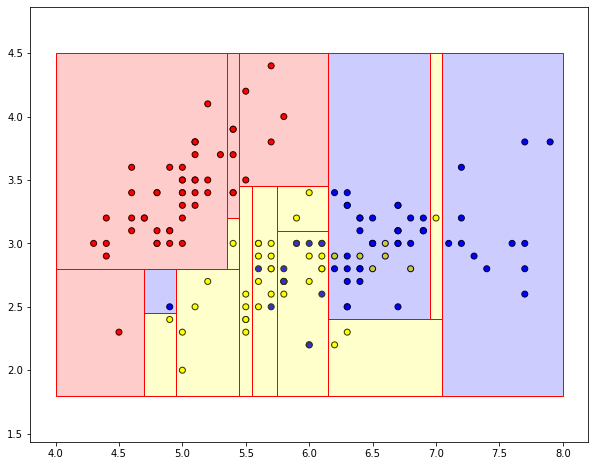

In [6]:
colors = np.array(["red","yellow","blue"])

fig, ax = plt.subplots(figsize=(10,8))
dfs_plot(dt.root)
ax.scatter(X[:,0],X[:,1],color=colors[y],edgecolors="black")
plt.axis("equal")
plt.show()